In [6]:
import galsim
import galsim_hub
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
STAMP_SIZE = 128
PIXEL_SCALE = 0.03

In [3]:
# Loads COSMOS sample
cosmos_cat = galsim.COSMOSCatalog()

# Loads model for flow-vae
model = galsim_hub.GenerativeGalaxyModel('modules/flow_vae_cosmos_128/generator')

# Noise model
cosmos_noise = galsim.getCOSMOSNoise()




INFO:tensorflow:Saver not created because there are no variables in the graph to restore


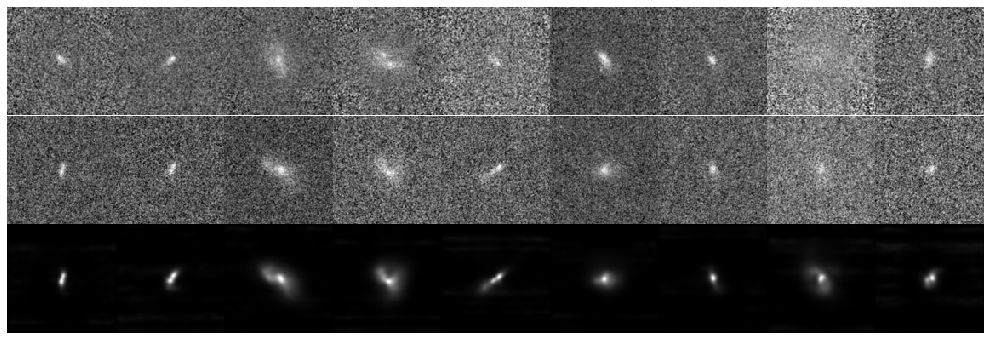

In [4]:
figure(figsize=(17.5,6))
for i in range(9):
    im_real = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim_n = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    
    # Drawing galaxy from cosmos
    gal = cosmos_cat.makeGalaxy(i, gal_type='real')
    psf = gal.original_psf
    real = galsim.Convolve(psf, gal)
    real.drawImage(im_real, method='no_pixel');
    
    # Drawing galaxy from generative model
    params = cosmos_cat.param_cat[cosmos_cat.orig_index][['flux_radius', 'mag_auto', 'zphot']][i:i+1]
    sim_gal = model.sample(params)
    sim = galsim.Convolve(psf, sim_gal)
    sim.drawImage(im_sim, method='no_pixel');
    sim.drawImage(im_sim_n, method='no_pixel');
    im_sim_n.addNoise(cosmos_noise)
    
    subplot(3,9,i+1)
    imshow(arcsinh(50*im_real.array), cmap='gray')
    axis('off')
    
    subplot(3,9,i+1+9)
    imshow(arcsinh(50*im_sim_n.array), cmap='gray')   
    axis('off')
    
    subplot(3,9,i+1+18)
    imshow(arcsinh(50*im_sim.array), cmap='gray')   
    axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
savefig('Figures/Figure1.pdf',bbox_inches='tight')